['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'no

Retrieving folder contents


Processing file 1b7IajyRjT9CBInwol5cgDU_eHBriNfX68wi-fBxEiPU Aashish Jayapuram Resume_Revised
Processing file 19UEYAqforRFDEwX1NuQGc6uNLOo8zkVI Aashish Jayapuram Resume_Revised.pdf
Processing file 1zu5mNGLDYmWVEuk8K0pqmip_18t1owIy AidanVanVoorhis_2025_Resume.pdf
Processing file 1KmRK-Ih_pIESFKaerwS-JOWU9TZWCoC7 Ardoine_Docteur_Resume.pdf
Processing file 1ImW6c5f2T62YKXqns59vlOcci8OHO4kz Cody Miller - Resume.pdf
Processing file 1BKt0nTyDV7pXcZmVgMEUcvCM2eyCDE5N Copy of Nathan Nicodin Resume.pdf
Processing file 10J6BZDZrC2dxEEfAK40myVW5bjRxvSYP David_Dinh_Resume_2026WOGPA.pdf
Processing file 15rp54TE62fk0BchfbuGkOSqk_78sMdUZ DJ Ravenell’s Resume.pdf
Processing file 1KvrpYO8NhQwYsoZ9u3nLcw0RzD4fVAIu Dustin_McDowell_Resume.pdf
Processing file 1R5vGipAoz5KbTnFYuyO5qwBDOZo8R-Ba Eli_Hatcher_resume.pdf
Processing file 1pUQf61wfrJpnLVuMr-ntAywfME_31jMu FINAL Resume- IT Intership.pdf
Processing file 1ZcEXTIM4TnlZ3bRAo2cw-9GEhuAJLEvk James Tabakian Resume 2025 (1).pdf
Processing file 1POh_77HKy-2

Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1b7IajyRjT9CBInwol5cgDU_eHBriNfX68wi-fBxEiPU
From (redirected): https://docs.google.com/document/d/1b7IajyRjT9CBInwol5cgDU_eHBriNfX68wi-fBxEiPU/export?format=docx
To: /home/bdshilli/Development/Github/CSCE580/Quiz1/temp_pdfs/Aashish Jayapuram Resume_Revised
10.9kB [00:00, 17.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=19UEYAqforRFDEwX1NuQGc6uNLOo8zkVI
To: /home/bdshilli/Development/Github/CSCE580/Quiz1/temp_pdfs/Aashish Jayapuram Resume_Revised.pdf
100%|██████████| 311k/311k [00:00<00:00, 3.27MB/s]
Downloading...
From: https://drive.google.com/uc?id=1zu5mNGLDYmWVEuk8K0pqmip_18t1owIy
To: /home/bdshilli/Development/Github/CSCE580/Quiz1/temp_pdfs/AidanVanVoorhis_2025_Resume.pdf
100%|██████████| 251k/251k [00:00<00:00, 3.11MB/s]
Downloading...
From: https://drive.google.com/uc?id=1KmRK-Ih_pIESFKaerwS-JOWU9TZWC

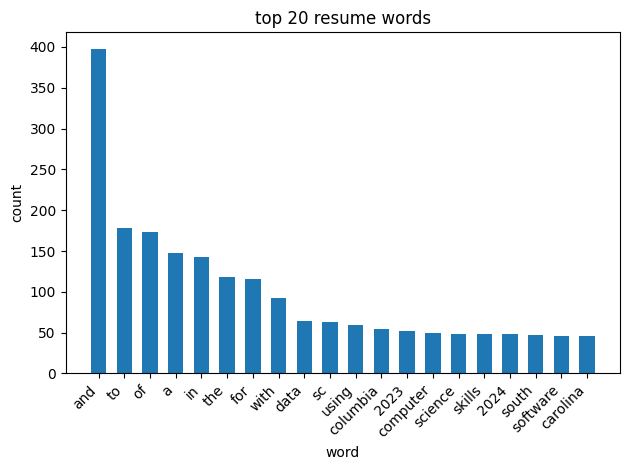

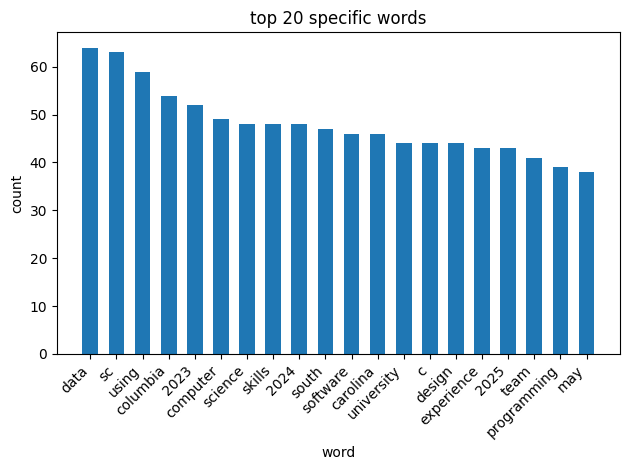

In [ ]:
import gdown
import os
import PyPDF2
import re
import matplotlib.pyplot
import numpy
from collections import Counter
import requests

folder_url = 'https://drive.google.com/drive/folders/1F6HRaliFWcakVvT605m8Js6a1D40Tx24?usp=sharing'
stop_words_url = "https://gist.githubusercontent.com/sebleier/554280/raw/7e0e4a1ce04c2bb7bd41089c9821dbcf6d0c786c/NLTK's%2520list%2520of%2520english%2520stopwords"

response = requests.get(stop_words_url)
stop_words = response.text.splitlines()
print(stop_words)

temp_dir = 'temp_downloads'
os.makedirs(temp_dir, exist_ok=True)

try:
    gdown.download_folder(folder_url, output=temp_dir, quiet=False)
except Exception as e:
    print(f"Error downloading folder: {e}")

all_text = ""
pdf_files = [f for f in os.listdir(temp_dir) if f.endswith('.pdf')]

if not pdf_files:
    print("No PDF files found in the downloaded folder.")
else:
    for file_name in pdf_files:
        local_file_path = os.path.join(temp_dir, file_name)

        try:
            pdf_reader = PyPDF2.PdfReader(local_file_path)
            for page in pdf_reader.pages:
                all_text += page.extract_text() or ""

        except Exception as e:
            print(f"Error processing '{file_name}': {e}")
            
    if all_text:
        cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', all_text).lower()
        words = cleaned_text.split()

        resume_words = Counter(words)
        
        resume_words_word = []
        resume_words_count = []

        for word, count in resume_words.most_common(20):
            resume_words_word.append(word)
            resume_words_count.append(count)

        matplotlib.pyplot.bar(resume_words_word, resume_words_count, width=0.6)
        matplotlib.pyplot.xlabel('word')
        matplotlib.pyplot.ylabel('count')
        matplotlib.pyplot.title('top 20 resume words')
        matplotlib.pyplot.xticks(rotation=45, ha='right')
        matplotlib.pyplot.tight_layout()
        matplotlib.pyplot.show()

        specific_words = Counter()
        
        for word, count in resume_words.items():
            if word not in stop_words:
                specific_words[word] += count

        specific_words_word = []
        specific_words_count = []

        for word, count in specific_words.most_common(20):
            specific_words_word.append(word)
            specific_words_count.append(count)

        matplotlib.pyplot.bar(specific_words_word, specific_words_count, width=0.6)
        matplotlib.pyplot.xlabel('word')
        matplotlib.pyplot.ylabel('count')
        matplotlib.pyplot.title('top 20 specific words')
        matplotlib.pyplot.xticks(rotation=45, ha='right')
        matplotlib.pyplot.tight_layout()
        matplotlib.pyplot.show()
        
    else:
        print("No text was extracted from the PDFs.")

    if os.path.exists(temp_dir):
        for f in os.listdir(temp_dir):
            os.remove(os.path.join(temp_dir, f))
        os.rmdir(temp_dir)